In [12]:
# import wget
# wget.download("https://lazyprogrammer.me/course_files/AirlineTweets.csv")

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from wordcloud import WordCloud

In [58]:
df=pd.read_csv('datasets/AirlineTweets.csv', encoding='ISO-8859-1')

In [59]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot: >

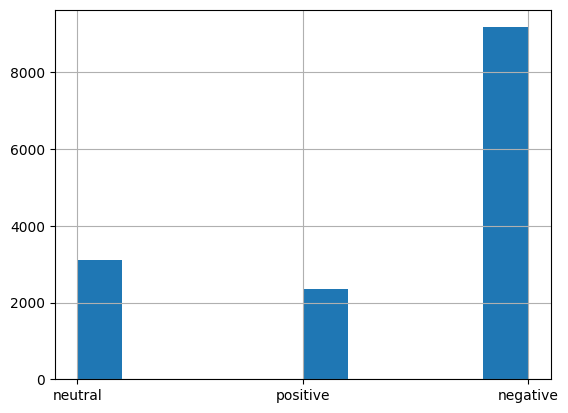

In [60]:
df['airline_sentiment'].hist()

In [61]:
df.rename(columns={'airline_sentiment':'labels','airline_sentiment_confidence':'confidence'},inplace=True)

In [62]:
df.head()

,tweet_id,labels,confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [146]:
new_df=df[['labels','text']].copy()

In [147]:
new_df

,labels,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [148]:
new_df['targets']=df['labels'].map({'positive':1,'negative':0,'neutral':2})

In [150]:
df_train,df_test=train_test_split(new_df)

In [154]:
df_test

,labels,text,targets
14518,negative,@AmericanAir I have no transportation to and g...,0
8135,neutral,@JetBlue Spent most of the winter in NNY with ...,2
6563,positive,@SouthwestAir Sent. Thanks VP!,1
4822,positive,@SouthwestAir kudos to the crew of flight 1050...,1
5013,negative,@SouthwestAir I have never had such awful cust...,0
...,...,...,...
9788,negative,@USAirways flight 2120. Please get us a flight...,0
6847,negative,@JetBlue why do this to me sending N598JB to U...,0
5182,negative,@SouthwestAir Officially a customer support ga...,0
11882,negative,@AmericanAir why would I pay $200 to reactivat...,0


In [151]:
vectorizer=TfidfVectorizer(max_features=2000)
X_train=vectorizer.fit_transform(df_train['text'])
X_test=vectorizer.transform(df_test['text'])

In [152]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157698 stored elements in Compressed Sparse Row format>

In [155]:
y_train=df_train['targets']
y_test=df_test['targets']

In [156]:
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
print("Train acc: ",lr.score(X_train,y_train))
print("Test acc: ",lr.score(X_test,y_test))

Train acc:  0.8520947176684882
Test acc:  0.8043715846994536


In [158]:
# pred_train=lr.predict(X_train)
# pred_test=lr.predict(X_test)
# print("Train F1-score: ",f1_score(y_train,pred_train))
# print("Test F1-score: ",f1_score(y_test,pred_test))

In [159]:
prob_train=lr.predict_proba(X_train)
prob_test=lr.predict_proba(X_test)
print("train AUC: ",roc_auc_score(y_train,prob_train,multi_class='ovo'))
print("test AUC: ",roc_auc_score(y_test,prob_test,multi_class='ovo'))

train AUC:  0.9417784224783796
test AUC:  0.898180649187804


In [161]:
cm=confusion_matrix(y_train,pred_train,normalize='true')
cm

array([[0.96329873, 0.00877321, 0.02792806],
       [0.18887665, 0.71806167, 0.09306167],
       [0.31741935, 0.05290323, 0.62967742]])

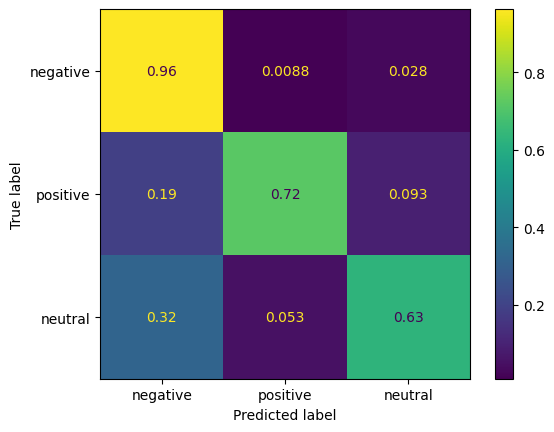

In [162]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative','positive','neutral'])
disp.plot()

In [163]:
cm_test=confusion_matrix(y_test,pred_test,normalize='true')
cm_test

array([[0.93501496, 0.01154339, 0.05344164],
       [0.2833638 , 0.58866545, 0.12797075],
       [0.37080103, 0.06718346, 0.5620155 ]])

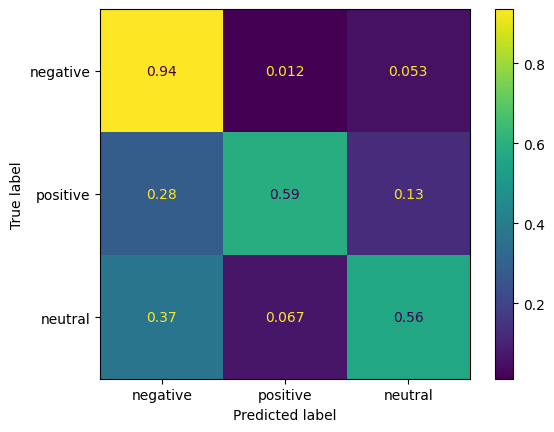

In [165]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['negative','positive','neutral'])
disp.plot()

In [143]:
#visualize data
def visualize(label):
    words=''
    for msg in new_df[new_df['labels']==label]['text']:
        msg=msg.lower()
        words+=msg
    wordcloud=WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

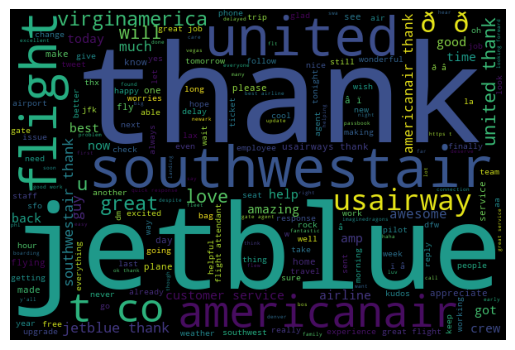

In [144]:
visualize('positive')

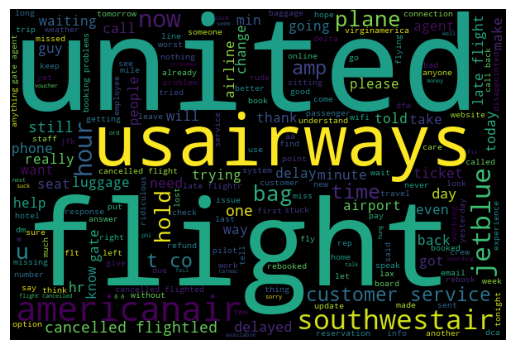

In [188]:
visualize('negative')

## Binary interpretation

In [189]:
target_map={'positive':1,'negative':0,'neutral':2}

In [190]:
binary_target_list=[target_map['positive'],target_map['negative']]
df_b_train=df_train[df_train['targets'].isin(binary_target_list)]
df_b_test=df_test[df_test['targets'].isin(binary_target_list)]

In [191]:
df_b_train.head()

,labels,text,targets
8972,negative,@USAirways you're killing me from the inside,0
10856,negative,@USAirways was on hold for about 45 minutes af...,0
9222,positive,"@USAirways no worries, your flight attendant t...",1
2089,negative,@united has been showing the same tone deaf vi...,0
3954,negative,@united are the miles going to be restructured...,0


In [192]:
X_train=vectorizer.fit_transform(df_b_train['text'])
X_test=vectorizer.transform(df_b_test['text'])

In [193]:
y_train=df_b_train['targets']
y_test=df_b_test['targets']

In [194]:
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
print("Train acc: ",lr.score(X_train,y_train))
print("Test acc: ",lr.score(X_test,y_test))

Train acc:  0.9285961871750433
Test acc:  0.9137214137214137


In [195]:
prob_train=lr.predict_proba(X_train)[:,1]
prob_test=lr.predict_proba(X_test)[:,1]
print("train AUC: ",roc_auc_score(y_train,prob_train))
print("test AUC: ",roc_auc_score(y_test,prob_test))

train AUC:  0.976876312841677
test AUC:  0.9593968578268656


In [197]:
#weights of model
lr.coef_

array([[-0.25903849,  0.36409348, -0.55088841, ..., -0.00859723,
        -0.33921422, -0.51744855]])

(array([  1.,   1.,   1.,   4.,   2.,   4.,  18.,  47., 127., 557., 723.,
        319., 120.,  45.,  13.,   3.,   1.,   5.,   3.,   1.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.48538554, -4.0595675 , -3.63374945, -3.20793141, -2.78211337,
        -2.35629532, -1.93047728, -1.50465923, -1.07884119, -0.65302315,
        -0.2272051 ,  0.19861294,  0.62443098,  1.05024903,  1.47606707,
         1.90188512,  2.32770316,  2.7535212 ,  3.17933925,  3.60515729,
         4.03097533,  4.45679338,  4.88261142,  5.30842947,  5.73424751,
         6.16006555,  6.5858836 ,  7.01170164,  7.43751968,  7.86333773,
         8.28915577]),
 <BarContainer object of 30 artists>)

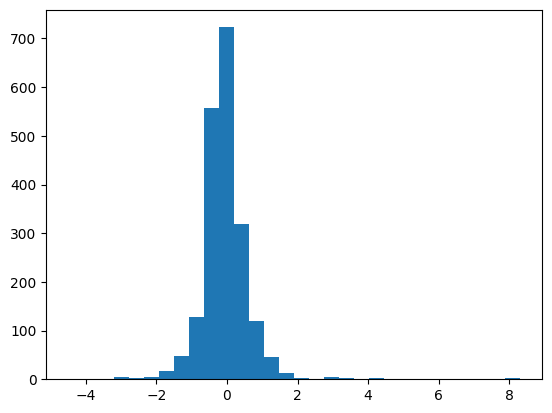

In [198]:
plt.hist(lr.coef_[0],bins=30)

In [199]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'usairways': 1872,
 'you': 1994,
 're': 1426,
 'killing': 986,
 'me': 1107,
 'from': 777,
 'the': 1745,
 'inside': 947,
 'was': 1907,
 'on': 1256,
 'hold': 883,
 'for': 755,
 'about': 72,
 '45': 49,
 'minutes': 1151,
 'after': 107,
 'speaking': 1649,
 'lady': 995,
 'at': 201,
 'airport': 124,
 'counter': 464,
 'gave': 798,
 'up': 1860,
 'no': 1210,
 'worries': 1970,
 'your': 1996,
 'flight': 727,
 'attendant': 205,
 'took': 1788,
 'care': 328,
 'of': 1241,
 'it': 959,
 'united': 1854,
 'has': 850,
 'been': 247,
 'showing': 1590,
 'same': 1526,
 'video': 1886,
 'all': 128,
 'these': 1750,
 'years': 1988,
 'how': 904,
 'wifi': 1946,
 'is': 955,
 'coming': 410,
 'not': 1220,
 'before': 248,
 'leave': 1012,
 'virginamerica': 1889,
 'are': 179,
 'miles': 1141,
 'going': 814,
 'to': 1780,
 'be': 242,
 'help': 868,
 'silver': 1596,
 'status': 1671,
 'out': 1282,
 'thought': 1762,
 'with': 1953,
 'guys': 829,
 'until': 1859,
 'today': 1781,
 'lol': 1053,
 'come': 407,
 'back': 226,
 'phl': 13

In [201]:
#weights for each word
threshold=2
print("Modt positive words: ")
for word,index in word_index_map.items():
    weight=lr.coef_[0][index]
    if weight>threshold:
        print(word,weight)

Modt positive words: 
worries 2.764472140846096
virginamerica 3.229922276293507
southwestair 3.1029065656495023
love 4.407876981276394
jetblue 3.2531076001058152
thank 8.289155771712338
great 5.109245641068978
good 3.1501434829063597
thanks 8.055174181008361
wonderful 2.2609173693963105
excellent 2.2432721135936426
best 3.6578203032716994
appreciate 2.934727564393713
thx 2.787365667618451
awesome 4.38259402756704
kudos 2.5664988965607107
amazing 3.2187346466221003


In [202]:
print("Modt negative words: ")
for word,index in word_index_map.items():
    weight=lr.coef_[0][index]
    if weight<-threshold:
        print(word,weight)

Modt negative words: 
hold -2.848479040045439
no -3.640298386507922
not -4.485385540463649
luggage -2.037915821403719
hour -2.3168985177462083
cancelled -2.836130409721664
worst -2.9226564548078615
delayed -2.8076935459167016
hours -3.2884566307561847
call -2.009240436634293
why -2.371550314277905
delay -2.0000488141157096
nothing -2.439998700217124
